In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import yaml

from utils import *

**Problem A: Use Markov chain Monte Carlo and the Metropolis-Hastings algorithm to simulate the 2D Ising
model at different temperatures T and magnetic field strengths B. Discuss your strategy for determining
the initial configuration, burn-in steps, total number of steps, and thinning (if any)**

In [30]:
#getting the parameters from the yaml file
with open("config.yaml", 'r') as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
print(config)
STEPS = config['STEPS']
N = config['N']
J = config['J']
KB = config['KB']
T = config['T']
BURNIN = config['BURNIN']

{'STEPS': 1000000, 'N': 30, 'J': 1, 'KB': 1, 'T': 2, 'BURNIN': 100000}


  0%|          | 0/1000000 [00:00<?, ?it/s]

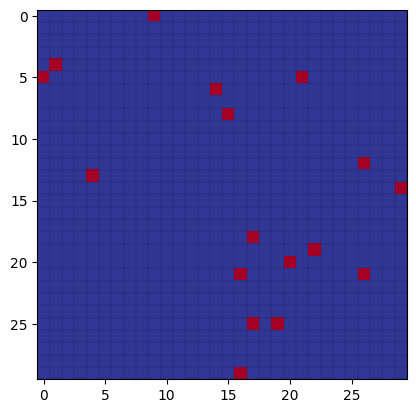

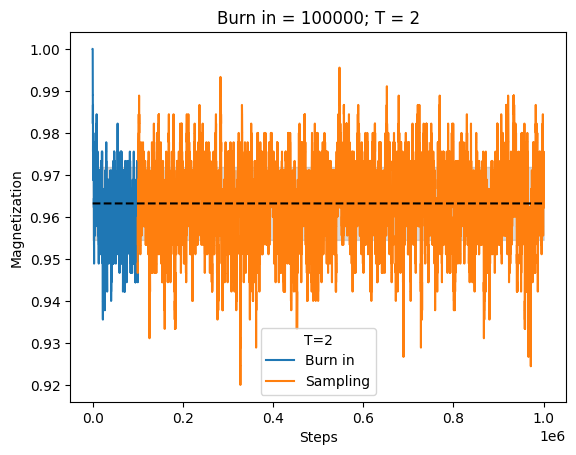

magnetization mean = 0.9632103580246919
magnetization std = 0.008684498226528593


In [13]:
#2d ising model:
m_valuesUP, lattice_spins, steps = spins(steps=STEPS, random=False)
plot_lattice(lattice_spins)
plot_m(m_valuesUP, burn_in = BURNIN)

In [31]:
temps = np.linspace(1,4,16)
temps

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. ])

In [38]:
# the initial condition of all spins up is computationally more efficint because it does not need to burn in
results = np.array([stats(temp, STEPS, BURNIN) for temp in temps])

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
plt.errorbar(temps, results.T[0], yerr=results.T[1])
plt.vlines([2.269], ymin=-0.2, ymax=1.0, color='red')
plt.title('net magnitization v. tempature')
plt.xlabel('tempature')
plt.ylabel('net magnitization') 
plt.plot()